**<h1>This notebook creates LeNet model architecture and trains it on MNIST dataset to extract weights</h1>**

*LeNet weights are hard to find on the internet, therefore we train a LeNet model on this notebook and extract the required weights*

**Loading MNIST data**

In [1]:
import numpy as np
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
# Create a new 4D tensor with shape (20000, height, width, 3)
X_train = np.repeat(X_train[:, :, :, np.newaxis], 3, axis=-1)
X_test = np.repeat(X_test[:, :, :, np.newaxis], 3, axis=-1)
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape (60000, 28, 28, 3) X_test shape (10000, 28, 28, 3)


*Uncomment this code block to convert 3d image array with square brackets to an image array with curly for compatibility with c++ codes*

In [11]:
# import numpy as np

# # Save the 3D numpy image array  to a .npy file
# np.save('image_raw.npy', X_test[328])


# # Load the 3D numpy array from the .npy file
# data = np.load('/content/image_raw.npy')


# # This code converts numpy image array into c++ compatible image array and stores the values in a text file

# # Open a file for writing
# with open('img_output.txt', 'w') as file:
#     file.write('{\n')

#     # Iterate over each 2D array (slice) in the 3D array
#     for slice_2d in data:
#         file.write('\t{\n')

#         # Iterate over each row in the 2D array
#         for i, row in enumerate(slice_2d):
#             file.write('\t\t{ ')

#             # Write each value in the row
#             for j, value in enumerate(row):
#                 file.write(str(value))

#                 # Add comma if it's not the last element of the row
#                 if j < len(row) - 1:
#                     file.write(', ')

#             # Add comma if it's not the last row vector in the 2D array
#             if i < len(slice_2d) - 1:
#                 file.write('},\n')
#             else:
#                 file.write('}\n')

#         file.write('\t}')

#         # Add comma if it's not the last 2D array in the 3D array
#         if not np.array_equal(slice_2d, data[-1]):
#             file.write(',\n')
#         else:
#             file.write('\n')

#     file.write('}')


**Taking a look at some random images from trainig set**

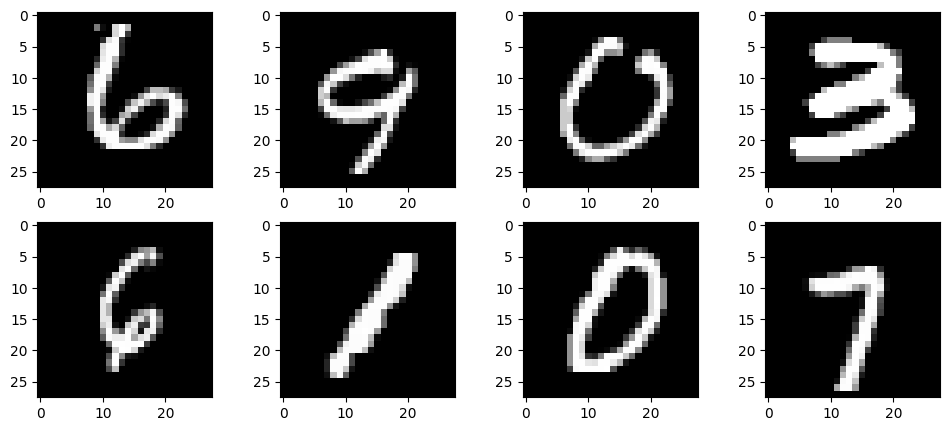

In [2]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(12,5))

for i in range(8):
  ind=random.randint(0,len(X_train))
  plt.subplot(2,4,i+1)
  plt.imshow(X_train[ind])

**Function for preprocessing input images**

In [3]:
from keras.utils import to_categorical
def preprocess_data(X_train,y_train,X_test,y_test):

  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  # Normalizing
  X_train=X_train/255
  X_test=X_test/255

  # One hot encoding
  y_train=to_categorical(y_train)
  y_test=to_categorical(y_test)

  return X_train,y_train, X_test, y_test


**Defining LeNet model's architecture**

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy

def LeNet():
  model = Sequential([
      Conv2D(6,kernel_size=5,activation='relu',padding='same',input_shape=(28,28,3)),

      MaxPooling2D(pool_size=2),

      Conv2D(16,kernel_size=5,activation='relu'),

      MaxPooling2D(pool_size = (2,2)),

      Flatten(),

      Dense(120,activation='relu'),

      Dense(10,activation='softmax'),
  ])


  model.compile(loss = categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics = ['accuracy'])

  return model

**Analysing model parameters**

In [6]:
lenet_model=LeNet()

lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

**Defining function to train the model**

In [7]:
import numpy as np

def train_model(model, X_train,y_train,X_test,y_test,epochs=2,batch_size=128):
  X_train,y_train,X_test,y_test=preprocess_data(X_train,y_train, X_test, y_test)
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                      steps_per_epoch = X_train.shape[0]//batch_size,
                      validation_data = (X_test, y_test),
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)
  y_pred=model.predict(X_test)
  # Save the weights after training
  model.save_weights('model_weights.h5')
  ans=[]
  for i in range(len(y_pred)):
    ans.append(np.argmax(y_pred[i]))

  return ans



**Training the model for two epochs**

In [8]:
y_pred=train_model(lenet_model,X_train,y_train,X_test,y_test)

Epoch 1/2
468/468 [==============================] - 47s 99ms/step - loss: 0.1363 - accuracy: 0.9577 - val_loss: 0.0711 - val_accuracy: 0.9788
Epoch 2/2
313/313 [==============================] - 3s 10ms/step


**Printing accuracy of the model**

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test)*100)

98.38


**Uncomment this code block to see which images have been misclassified**

In [12]:
# # Code to see misclassified images
# for i in range(len(X_test)):
#   if(y_test[i]!=y_pred[i]):
#     plt.imshow(X_test[i])
#     plt.title("predicted: " + str(y_pred[i]) + " Actual: " + str(y_test[i]))
#     plt.show()


**We successfully created LeNet model to classify numbers from 0 to 9**